<a href="https://colab.research.google.com/github/shajeeraza12/shajeeraza12/blob/main/AOATask7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Author: Shajee Raza(Сайид мухаммад шаджи раза)
# Task 7. Data compressing algorithms.

The goal of this work is to explore and implement different data compression algorithms (Huffman and LZW) on text data, analyze their performance in terms of compression ratio, and compare their effectiveness. Additionally, we aim to design a simple method to embed state names into datasets for use in machine learning tasks.

# Brief theoretical part
***Data Compression:***

Data compression reduces the size of data by eliminating redundancy. It is categorized into two types: lossless (preserves original data) and lossy (some data is lost).

***Huffman Algorithm:***

A lossless compression algorithm that assigns shorter binary codes to more frequent characters and longer codes to less frequent ones, based on a binary tree structure.

***Lempel-Ziv-Welch (LZW) Algorithm:***

A lossless algorithm that replaces repeating patterns in the text with dictionary-based codes, dynamically building the dictionary as it processes the data.

***State Embedding in ML:***

Embedding state names into datasets involves representing each state (e.g., Afghanistan to Zimbabwe) as a unique feature (e.g., numeric or one-hot encoding). This contextualizes the data geographically or regionally for improved learning in global ML tasks.

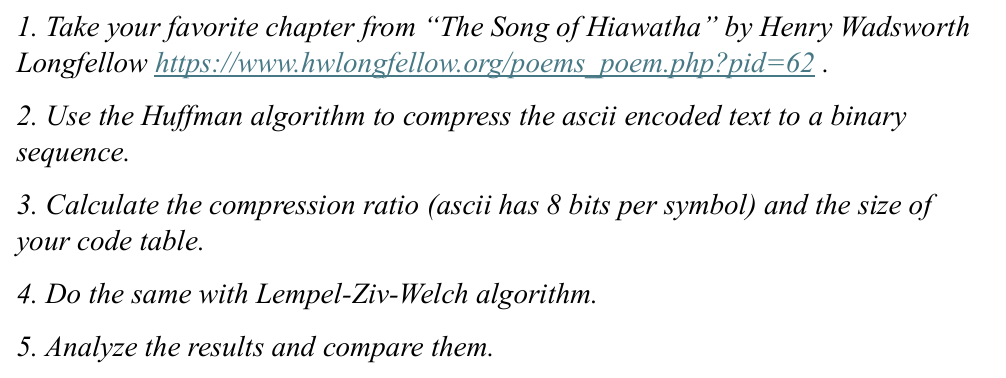

# The poem that i've chosen is "The Song of Hiawatha XI. Hiawatha's Wedding-Feast"

# Loading and pre-processing the text

In [1]:
def load_text():
    # Replace this sample text with your actual poem text
    text = """You shall hear how Pau-Puk-Keewis,
    How the handsome Yenadizze
    Danced at Hiawatha's wedding;
    How the gentle Chibiabos,
    He the sweetest of musicians,
    Sang his songs of love and longing;
    How Iagoo, the great boaster,
    He the marvellous story-teller,
    Told his tales of strange adventure,
    That the feast might be more joyous,
    That the time might pass more gayly,
    And the guests be more contented.
      Sumptuous was the feast Nokomis
    Made at Hiawatha's wedding;
    All the bowls were made of bass-wood,
    White and polished very smoothly,
    All the spoons of horn of bison,
    Black and polished very smoothly.
      She had sent through all the village
    Messengers with wands of willow,
    As a sign of invitation,
    As a token of the feasting;
    And the wedding guests assembled,
    Clad in all their richest raiment,
    Robes of fur and belts of wampum,
    Splendid with their paint and plumage,
    Beautiful with beads and tassels.
      First they ate the sturgeon, Nahma,
    And the pike, the Maskenozha,
    Caught and cooked by old Nokomis;
    Then on pemican they feasted,
    Pemican and buffalo marrow,
    Haunch of deer and hump of bison,
    Yellow cakes of the Mondamin,
    And the wild rice of the river.
      But the gracious Hiawatha,
    And the lovely Laughing Water,
    And the careful old Nokomis,
    Tasted not the food before them,
    Only waited on the others,
    Only served their guests in silence.
      And when all the guests had finished,
    Old Nokomis, brisk and busy,
    From an ample pouch of otter,
    Filled the red-stone pipes for smoking
    With tobacco from the South-land,
    Mixed with bark of the red willow,
    And with herbs and leaves of fragrance.
      Then she said, "O Pau-Puk-Keewis,
    Dance for us your merry dances,
    Dance the Beggar's Dance to please us,
    That the feast may be more joyous,
    That the time may pass more gayly,
    And our guests be more contented!"
      Then the handsome Pau-Puk-Keewis,
    He the idle Yenadizze,
    He the merry mischief-maker,
    Whom the people called the Storm-Fool,
    Rose among the guests assembled.
      Skilled was he in sports and pastimes,
    In the merry dance of snow-shoes,
    In the play of quoits and ball-play;
    Skilled was he in games of hazard,
    In all games of skill and hazard,
    Pugasaing, the Bowl and Counters,
    Kuntassoo, the Game of Plum-stones.
      Though the warriors called him Faint-Heart,
    Called him coward, Shaugodaya,
    Idler, gambler, Yenadizze,
    Little heeded he their jesting,
    Little cared he for their insults,
    For the women and the maidens
    Loved the handsome Pau-Puk-Keewis.
      He was dressed in shirt of doeskin,
    White and soft, and fringed with ermine,
    All inwrought with beads of wampum;
    He was dressed in deer-skin leggings,
    Fringed with hedgehog quills and ermine,
    And in moccasins of buck-skin,
    Thick with quills and beads embroidered.
    On his head were plumes of swan's down,
    On his heels were tails of foxes,
    In one hand a fan of feathers,
    And a pipe was in the other.
      Barred with streaks of red and yellow,
    Streaks of blue and bright vermilion,
    Shone the face of Pau-Puk-Keewis.
    From his forehead fell his tresses,
    Smooth, and parted like a woman's,
    Shining bright with oil, and plaited,
    Hung with braids of scented grasses,
    As among the guests assembled,
    To the sound of flutes and singing,
    To the sound of drums and voices,
    Rose the handsome Pau-Puk-Keewis,
    And began his mystic dances.
      First he danced a solemn measure,
    Very slow in step and gesture,
    In and out among the pine-trees,
    Through the shadows and the sunshine,
    Treading softly like a panther.
    Then more swiftly and still swifter,
    Whirling, spinning round in circles,
    Leaping o'er the guests assembled,
    Eddying round and round the wigwam,
    Till the leaves went whirling with him,
    Till the dust and wind together
    Swept in eddies round about him.
      Then along the sandy margin
    Of the lake, the Big-Sea-Water,
    On he sped with frenzied gestures,
    Stamped upon the sand, and tossed it
    Wildly in the air around him;
    Till the wind became a whirlwind,
    Till the sand was blown and sifted
    Like great snowdrifts o'er the landscape,
    Heaping all the shores with Sand Dunes,
    Sand Hills of the Nagow Wudjoo!
      Thus the merry Pau-Puk-Keewis
    Danced his Beggar's Dance to please them,
    And, returning, sat down laughing
    There among the guests assembled,
    Sat and fanned himself serenely
    With his fan of turkey-feathers.
      Then they said to Chibiabos,
    To the friend of Hiawatha,
    To the sweetest of all singers,
    To the best of all musicians,
    "Sing to us, O Chibiabos!
    Songs of love and songs of longing,
    That the feast may be more joyous,
    That the time may pass more gayly,
    And our guests be more contented!"
      And the gentle Chibiabos
    Sang in accents sweet and tender,
    Sang in tones of deep emotion,
    Songs of love and songs of longing;
    Looking still at Hiawatha,
    Looking at fair Laughing Water,
    Sang he softly, sang in this wise:
      "Onaway!  Awake, beloved!
    Thou the wild-flower of the forest!
    Thou the wild-bird of the prairie!
    Thou with eyes so soft and fawn-like!
      "If thou only lookest at me,
    I am happy, I am happy,
    As the lilies of the prairie,
    When they feel the dew upon them!
      "Sweet thy breath is as the fragrance
    Of the wild-flowers in the morning,
    As their fragrance is at evening,
    In the Moon when leaves are falling.
      "Does not all the blood within me
    Leap to meet thee, leap to meet thee,
    As the springs to meet the sunshine,
    In the Moon when nights are brightest?
      "Onaway! my heart sings to thee,
    Sings with joy when thou art near me,
    As the sighing, singing branches
    In the pleasant Moon of Strawberries!
      "When thou art not pleased, beloved,
    Then my heart is sad and darkened,
    As the shining river darkens
    When the clouds drop shadows on it!
      "When thou smilest, my beloved,
    Then my troubled heart is brightened,
    As in sunshine gleam the ripples
    That the cold wind makes in rivers.
      "Smiles the earth, and smile the waters,
    Smile the cloudless skies above us,
    But I lose the way of smiling
    When thou art no longer near me!
      "I myself, myself! behold me!
    Blood of my beating heart, behold me!
    Oh awake, awake, beloved!
    Onaway! awake, beloved!"
      Thus the gentle Chibiabos
    Sang his song of love and longing;
    And Iagoo, the great boaster,
    He the marvellous story-teller,
    He the friend of old Nokomis,
    Jealous of the sweet musician,
    Jealous of the applause they gave him,
    Saw in all the eyes around him,
    Saw in all their looks and gestures,
    That the wedding guests assembled
    Longed to hear his pleasant stories,
    His immeasurable falsehoods.
      Very boastful was Iagoo;
    Never heard he an adventure
    But himself had met a greater;
    Never any deed of daring
    But himself had done a bolder;
    Never any marvellous story
    But himself could tell a stranger.
      Would you listen to his boasting,
    Would you only give him credence,
    No one ever shot an arrow
    Half so far and high as he had;
    Ever caught so many fishes,
    Ever killed so many reindeer,
    Ever trapped so many beaver!
      None could run so fast as he could,
    None could dive so deep as he could,
    None could swim so far as he could;
    None had made so many journeys,
    None had seen so many wonders,
    As this wonderful Iagoo,
    As this marvellous story-teller!
      Thus his name became a by-word
    And a jest among the people;
    And whene'er a boastful hunter
    Praised his own address too highly,
    Or a warrior, home returning,
    Talked too much of his achievements,
    All his hearers cried, "Iagoo!
    Here's Iagoo come among us!"
      He it was who carved the cradle
    Of the little Hiawatha,
    Carved its framework out of linden,
    Bound it strong with reindeer sinews;
    He it was who taught him later
    How to make his bows and arrows,
    How to make the bows of ash-tree,
    And the arrows of the oak-tree.
    So among the guests assembled
    At my Hiawatha's wedding
    Sat Iagoo, old and ugly,
    Sat the marvellous story-teller.
      And they said, "O good Iagoo,
    Tell us now a tale of wonder,
    Tell us of some strange adventure,
    That the feast may be more joyous,
    That the time may pass more gayly,
    And our guests be more contented!"
      And Iagoo answered straightway,
    "You shall hear a tale of wonder,
    You shall hear the strange adventures
    Of Osseo, the Magician,
    From the Evening Star descending." """

    # Preprocess text: remove extra spaces and newline characters
    return text.strip()

poem_text = load_text()
print(poem_text[:200])  # Display the first 200 characters of the text


You shall hear how Pau-Puk-Keewis,
    How the handsome Yenadizze
    Danced at Hiawatha's wedding;
    How the gentle Chibiabos,
    He the sweetest of musicians,
    Sang his songs of love and longi


# Huffman Encoding

In [2]:
import heapq
from collections import defaultdict, Counter

# Build frequency table
def build_frequency_table(text):
    freq = Counter(text)
    return freq

# Build Huffman Tree
def build_huffman_tree(freq_table):
    heap = [[weight, [symbol, ""]] for symbol, weight in freq_table.items()]
    heapq.heapify(heap)

    while len(heap) > 1:
        low = heapq.heappop(heap)
        high = heapq.heappop(heap)
        for pair in low[1:]:
            pair[1] = '0' + pair[1]
        for pair in high[1:]:
            pair[1] = '1' + pair[1]
        heapq.heappush(heap, [low[0] + high[0]] + low[1:] + high[1:])

    return sorted(heapq.heappop(heap)[1:], key=lambda x: (len(x[1]), x))

# Generate Huffman Encoded Text
def huffman_encode(text, huffman_table):
    huffman_dict = {symbol: code for symbol, code in huffman_table}
    encoded_text = ''.join(huffman_dict[char] for char in text)
    return encoded_text, huffman_dict

# Main function for Huffman encoding
def huffman_compression(text):
    freq_table = build_frequency_table(text)
    huffman_table = build_huffman_tree(freq_table)
    encoded_text, huffman_dict = huffman_encode(text, huffman_table)
    return encoded_text, huffman_dict

huffman_encoded_text, huffman_code_table = huffman_compression(poem_text)
print(f"Huffman Encoded Text Length: {len(huffman_encoded_text)}")
print(f"Huffman Code Table Size: {len(huffman_code_table)}")


Huffman Encoded Text Length: 39229
Huffman Code Table Size: 59


# Lempel-Ziv-Welch (LZW) Compression

In [3]:
def lzw_compression(text):
    dictionary = {chr(i): i for i in range(256)}
    dict_size = 256
    p = ""
    compressed_data = []

    for c in text:
        pc = p + c
        if pc in dictionary:
            p = pc
        else:
            compressed_data.append(dictionary[p])
            dictionary[pc] = dict_size
            dict_size += 1
            p = c

    if p:
        compressed_data.append(dictionary[p])

    return compressed_data, len(dictionary)

lzw_compressed_data, lzw_dict_size = lzw_compression(poem_text)
print(f"LZW Compressed Data Length: {len(lzw_compressed_data)}")
print(f"LZW Dictionary Size: {lzw_dict_size}")

LZW Compressed Data Length: 3165
LZW Dictionary Size: 3420


# Calculating compression ratios

In [4]:
def calculate_compression_ratios(original_text, huffman_encoded_text, lzw_compressed_data):
    original_size = len(original_text) * 8  # ASCII: 8 bits per symbol
    huffman_size = len(huffman_encoded_text)
    lzw_size = len(lzw_compressed_data) * 16  # Assume 16-bit representation for LZW codes

    huffman_ratio = huffman_size / original_size
    lzw_ratio = lzw_size / original_size

    print(f"Original Size: {original_size} bits")
    print(f"Huffman Compressed Size: {huffman_size} bits")
    print(f"LZW Compressed Size: {lzw_size} bits")
    print(f"Huffman Compression Ratio: {huffman_ratio:.2f}")
    print(f"LZW Compression Ratio: {lzw_ratio:.2f}")

calculate_compression_ratios(poem_text, huffman_encoded_text, lzw_compressed_data)

Original Size: 72072 bits
Huffman Compressed Size: 39229 bits
LZW Compressed Size: 50640 bits
Huffman Compression Ratio: 0.54
LZW Compression Ratio: 0.70


Huffman is more efficient (0.54 vs. 0.70 compression ratio):

Huffman compression performs better here because the text has distinct character frequencies that Huffman can leverage effectively.

The poem may not have enough repeated substrings for LZW to build an efficient dictionary.

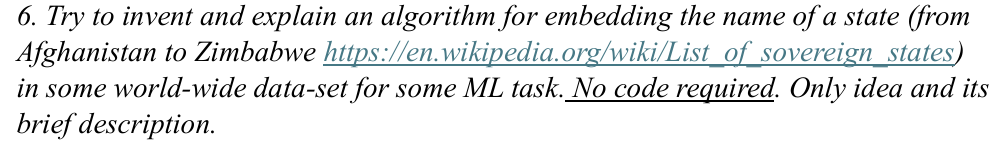

For this task, what we can do is.

First - For text pre-processing, we can convert all state names to lower case to ensure uniformity. Secondly we can tokenize them so that its easy to further process them, and remove stop words from them.

Secondly - We can add contextual features like geographical data i.e neighboring countries, continent, geographical coordinates etc. We can also include features like GDP, population and development index.

Thirdly - we can create word embeddings using Word2Vec or Glove into dense vector representations and then aggregate word embeddings to create a single vector representation for state name.

Fourthly - We can use any dimensionality reduction technique to reduce the complexity and maintain the variance in data.

Fifth - Concatenate the aggregated word embedding with the contextual features to form a comprehensive embedding vector for each state and then we can normalize it.

**Applications:**

First - we can use these embeddings to group similar states based on their names and features.

Second - we can train classifiers to predict categories or attributes of states based on their embeddings.

Third - we can build a recommendation system for tourists or investors, something like that.
